In [5]:
import numpy as np
import sys
sys.path.append('./../')
from binary import *
from makePop_while import *
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)
plt.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})

In [6]:
def trial_kick(sig_plane,mu_perp,sig_perp):

    vk_x = np.random.normal(loc=0.,scale=sig_plane)
    vk_y = np.random.normal(loc=0.,scale=sig_plane)

    # Perpendicular kick
    vk_z = np.random.normal(loc=mu_perp,scale=sig_perp)

    return vk_x,vk_y,vk_z

In [7]:
mMax = 75.
mMin = 5.
bq = 1.3
alpha = -2.2

n=30000
    
# Tilt angles
t1 = genTruncatedNorm(n,0,0.*np.pi/180.,-np.pi,np.pi)
t2 = genTruncatedNorm(n,0,0.*np.pi/180.,-np.pi,np.pi)

# Azimuthal angles
phi1 = 2.*np.pi*np.random.random(n)
phi2 = 2.*np.pi*np.random.random(n)

# Spin magnitudes
a1 = np.zeros(n)
a2 = genTruncatedNorm(n,0.3,0.2,0,1)

# Masses
beta = 1.
m1 = np.power((mMax**(1.+alpha)-mMin**(1.+alpha))*np.random.random(n) + mMin**(1.+alpha),1./(1.+alpha))
m2 = np.power((m1**(1.+bq)-mMin**(1.+bq))*np.random.random(n)+mMin**(1.+bq),1./(1.+bq))/beta
#m2 = np.random.normal(size=n,loc=m1,scale=5.)
#m2 = np.random.random(n)*(mMax-mMin)+mMin

# Separation
sep = 10.**(np.log10(5.) + (np.log10(300)-np.log10(5.))*np.random.random(n))

#period = 10.**(3.*np.random.random(n)-1)*24.*3600
#sep = np.power(G*(m1+m2)*Msun*period**2./(4.*np.pi**2.),1./3.)/Rsun

binaries = np.array([binary(m1[i],m2[i],a1[i],a2[i],t1[i],t2[i],phi1[i],phi2[i],sep[i]*Rsun) for i in range(n)])
print(np.mean([b.v_orb() for b in binaries]))
chiEff_initial = np.array([b.chi_effective() for b in binaries])
chiP_initial = np.array([b.chi_p() for b in binaries])

survived = np.array([b.kick(random_kick(400.,400.),beta) for b in binaries])
mergerTimes = np.array([b.time_to_merger() for b in binaries])/1e10/year
bound = (survived==1)
successful = ((survived==1)*(mergerTimes<1))

chiEff_post = np.array([b.chi_effective() for b in binaries])
chiP_post = np.array([b.chi_p() for b in binaries])

chiEff_bound = np.array([b.chi_effective() for b in binaries[bound]])
chiP_bound = np.array([b.chi_p() for b in binaries[bound]])

chiEff_success = np.array([b.chi_effective() for b in binaries[successful]])
chiP_success = np.array([b.chi_p() for b in binaries[successful]])

377479.7859042086


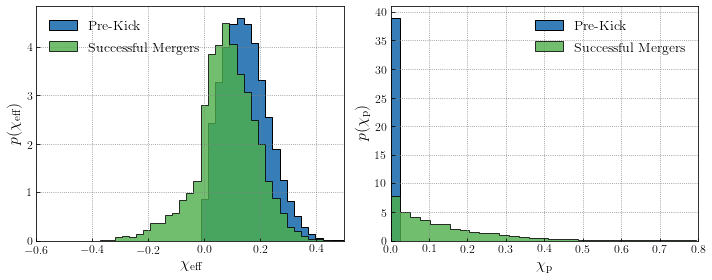

In [10]:
fig = plt.figure(figsize=(10.,4))

ax = fig.add_subplot(121)
ax.hist(chiEff_initial,bins=np.linspace(-0.5,0.5,40),density=True,
        edgecolor='black',color='#377eb8',histtype='stepfilled',label='Pre-Kick')
ax.hist(chiEff_bound,bins=np.linspace(-0.5,0.5,40),alpha=0.8,histtype='stepfilled',
        edgecolor='black',color='#4daf4a',density=True,label='Successful Mergers')

ax.xaxis.grid(True,which='major',ls=':',color='grey')
ax.yaxis.grid(True,which='major',ls=':',color='grey')
ax.set_xlim(-0.6,0.5)
ax.tick_params(direction="in")
ax.tick_params(labelsize=12)
ax.set_xlabel(r'$\chi_\mathrm{eff}$',fontsize=16)
ax.set_ylabel(r'$p(\chi_\mathrm{eff})$',fontsize=16)

ax.legend(loc='upper left',frameon=False,fontsize=14)


ax = fig.add_subplot(122)
ax.hist(chiP_initial,bins=np.linspace(0,1,40),density=True,
        edgecolor='black',color='#377eb8',histtype='stepfilled',label='Pre-Kick')

ax.hist(chiP_bound,bins=np.linspace(0,1,40),alpha=0.8,histtype='stepfilled',
        edgecolor='black',color='#4daf4a',density=True,label='Successful Mergers')

ax.xaxis.grid(True,which='major',ls=':',color='grey')
ax.yaxis.grid(True,which='major',ls=':',color='grey')
ax.set_xlim(0.,0.8)

ax.tick_params(labelsize=12)
ax.set_xlabel(r'$\chi_\mathrm{p}$',fontsize=16)
ax.set_ylabel(r'$p(\chi_\mathrm{p})$',fontsize=16)
ax.tick_params(direction="in")
ax.legend(loc='upper right',frameon=False,fontsize=14)

plt.tight_layout()
plt.savefig('demo_initialAlignment.pdf',bbox_inches='tight')
plt.show()

In [ ]:
survived[survived==True].size

In [69]:
m1_direct = np.array([b.m1 for b in binaries[successful]])
m2_direct = np.array([b.m2 for b in binaries[successful]])

In [121]:
m1_ej = np.array([b.m1 for b in binaries[successful]])
m2_ej = np.array([b.m2 for b in binaries[successful]])

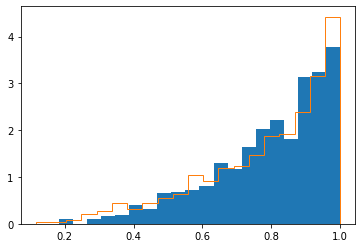

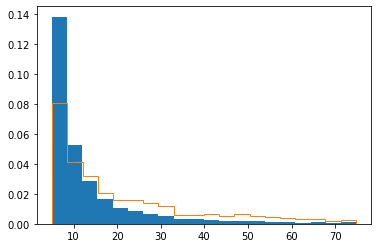

In [122]:
plt.hist(m2_direct/m1_direct,bins=20,density=True)
plt.hist(np.minimum(m2_ej,m1_ej)/np.maximum(m2_ej,m1_ej),bins=20,density=True,histtype='step')
plt.show()

plt.hist(m1,bins=20,density=True)
plt.hist(m1_ej,bins=20,density=True,histtype='step')
plt.show()

In [34]:
0.75*m2_ej/(m2_ej/0.75+m1_ej)

array([0.22496912, 0.25729149, 0.27434008, 0.28022746, 0.19136251,
       0.20698083, 0.23239218, 0.21448177, 0.22104063, 0.25589056,
       0.27098259, 0.22338481, 0.15454988, 0.12710037, 0.2059835 ,
       0.24555802, 0.23718128, 0.25360202, 0.1281252 , 0.26659225,
       0.28051595, 0.24314622, 0.26409433, 0.28037111, 0.24408293,
       0.27782381, 0.21979494, 0.27231773, 0.25699083, 0.23300389,
       0.25528478, 0.24748731, 0.26128804, 0.24015865, 0.23341857,
       0.1230952 , 0.22996918, 0.23103059, 0.28004293, 0.12727271,
       0.10115747, 0.27569433, 0.23585841, 0.22190754, 0.2464304 ,
       0.13510913, 0.13490149, 0.25924811, 0.19845906, 0.28095037,
       0.27974593, 0.24580501, 0.22692225, 0.23113686, 0.27019294,
       0.28108359, 0.25501029, 0.11682401, 0.24862082, 0.24596816,
       0.20946261, 0.25645554, 0.24571729, 0.27495728, 0.23657063,
       0.23096463, 0.26744809, 0.27498532, 0.23597285, 0.27590712,
       0.22346311, 0.25406335, 0.20469847, 0.13434882, 0.26283